In [1]:
include("C:\\Users\\parra\\OneDrive\\Desktop\\My Stuff\\Research Stuff\\Julia Code\\Research Project\\OUPLibrary.jl")

   Resolving package versions...


  No Changes to `C:\Users\parra\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\parra\.julia\environments\v1.9\Manifest.toml`

   Resolving package versions...


  No Changes to `C:\Users\parra\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\parra\.julia\environments\v1.9\Manifest.toml`


AverageValue (generic function with 1 method)

Elapsed time: 1.9577101 seconds


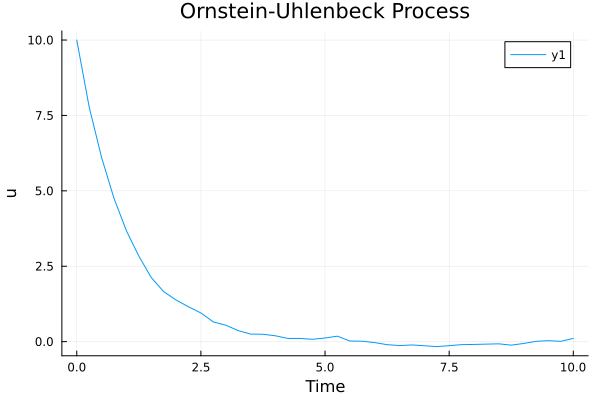

In [2]:
θ = 1.0
μ = 0
σ = sqrt(2)

u0 = 10.0  
tf = 10

tspan = (0.0, tf)  # Time interval from 0.0 to 10.0

samples = 100
saveint = 0.25

elapsed_time = @elapsed begin
    
    sol = AverageValue(θ, μ, σ, u0, tspan, samples, saveint)

    t = range(0, stop = tf, step = saveint)

end

println("Elapsed time: $elapsed_time seconds")

plot(t, sol, xlabel = "Time", ylabel = "u", title = "Ornstein-Uhlenbeck Process")

In [13]:
function sampletime(θ, μ, σ, u0, tspan, samples, saveint, tf)
    
    elapsed_time = @elapsed begin
    
        sol = AverageValue(θ, μ, σ, u0, tspan, samples, saveint)
    
        t = range(0, stop = tf, step = saveint)
    
    end

    s = elapsed_time

    return s

end

sampletime (generic function with 1 method)

In [19]:
function timeperSample(θ, μ, σ, u0, tspan, saveint, tf)

    samp = range(1, stop = 100, step = 1)

    tp = []

    for i in samp

        ts = sampletime(θ, μ, σ, u0, tspan, i, saveint, tf)

        push!(tp,ts)

    end

    return tp

end

timeperSample (generic function with 1 method)

In [20]:
tps = timeperSample(θ, μ, σ, u0, tspan, saveint, tf)

100-element Vector{Any}:
 0.0001678
 0.0001103
 0.0001279
 0.000171
 0.0002199
 0.0002508
 0.0003445
 0.0003368
 0.0003881
 0.000415
 ⋮
 0.0040294
 0.004052
 0.0044663
 0.0040922
 0.0041807
 0.0041867
 0.0041849
 0.0043223
 0.0044131

In [23]:
function timeperSampleAverage(θ, μ, σ, u0, tspan, saveint, tf)

    samp = range(1, stop = 100, step = 1)

    alltps = []

    for i in samp

        ts = timeperSample(θ, μ, σ, u0, tspan, saveint, tf)

        push!(alltps,ts)

    end

    return sum(alltps, dims=1)/100

end

timeperSampleAverage (generic function with 1 method)

In [24]:
tpsaverage = timeperSampleAverage(θ, μ, σ, u0, tspan, saveint, tf)

plot(tpsaverage, xlabel = "Time", ylabel = "u", title = "Ornstein-Uhlenbeck Process")